# Model to check Loan Eligibility

### Apoorva Kalaskar
### Batch: DP-2008-OM

#### Problem Statement
About Company:

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. 

Problem:

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Data:

Variable:            Description 

Loan_ID:             Unique Loan ID 

Gender:              Male/ Female 

Married:             Applicant married (Y/N) 

Dependents:          Number of dependents

Education:           Applicant Education (Graduate/ Under Graduate) 

Self_Employed:       Self employed (Y/N) 

ApplicantIncome:     Applicant income 

CoapplicantIncome:   Coapplicant income 

LoanAmount:          Loan amount in thousands 

Loan_Amount_Term:    Term of loan in months 

Credit_History:      Credit history meets guidelines ##(means Yes or No, 0 or 1 categorical) 

Property_Area:       Urban/ Semi Urban/ Rural 

Loan_Status:         Loan approved (Y/N) 

#### Q. Build a model to identify the customers segments, those are eligible for loan using Loan_Data_train and Predict Loan_Status for Loan_Data_test.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

In [2]:
# Import dataset

data = pd.read_excel("Loan_Data_Train.xlsx")

In [3]:
# Displaying head data

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Understaning dataset

In [4]:
# Shape of dataset

data.shape

(614, 13)

In [5]:
# Attributes in dataset

data.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Checking for duplicate values

data.duplicated().sum()

0

In [7]:
# Understanding datatypes of dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Checking for null values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We understand below points after checking the above cells:
1. The dataset has 614 rows across 13 columns. 
2. There are 13 attributes in dataset and we need to predict Loan_Status which is categorical variable. 
3. There are no duplicate values in dataset. 
4. We have numerical as well as string values in dataset. Dataset is a combination of numerical and categorical variables. 
5. There are missing values in dataset so we need to impute values. 

## Exploratory Data Analysis

### Univariate Analysis

In [9]:
# Checking statistical measures

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# Data Visualization of numerical and categorical variables

data_num = data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
data_cat = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History',
                'Property_Area','Loan_Status']

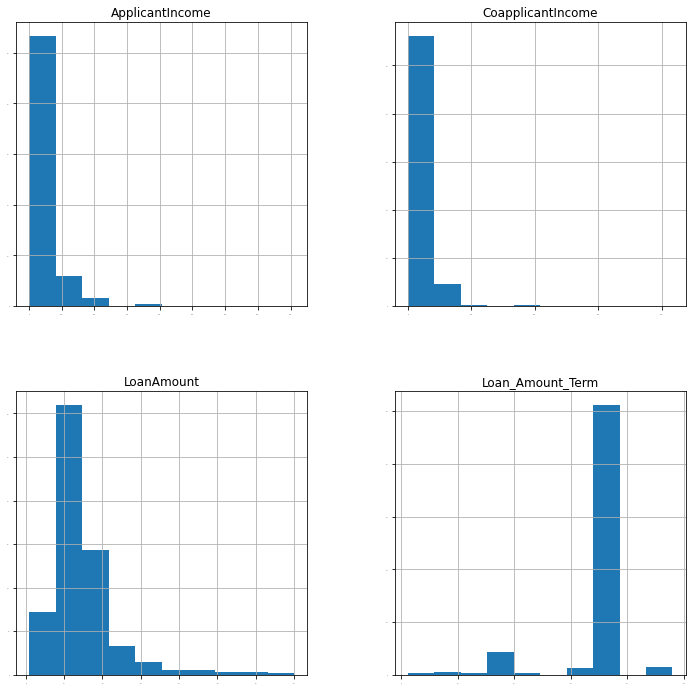

In [11]:
# Histogram

data_num.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(12,12))
plt.show()

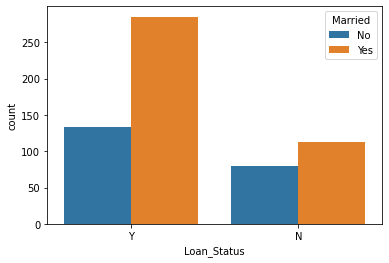

In [12]:
# Countplot of Loan_Status Vs Marrital Status

sns.countplot(x = 'Loan_Status', hue = 'Married', data = data)
plt.show()

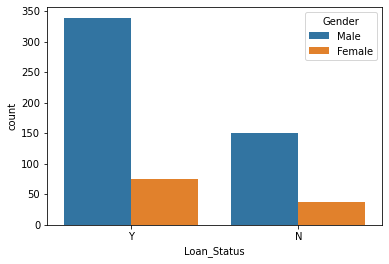

In [13]:
# Countplot of Loan_Status Vs Gender

sns.countplot(x = 'Loan_Status', hue = 'Gender', data = data)
plt.show()

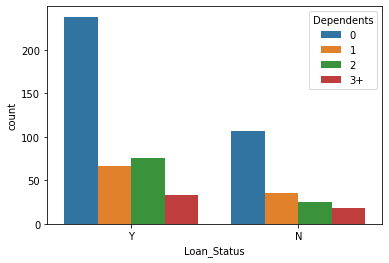

In [14]:
# Countplot of Loan_Status Vs Dependents

sns.countplot(x = 'Loan_Status', hue = 'Dependents', data = data)
plt.show()

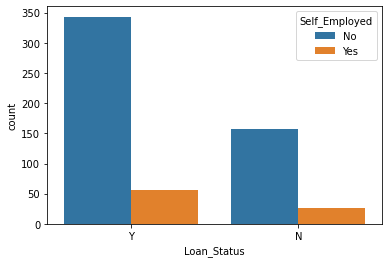

In [15]:
# Countplot of Loan_Status Vs Self_Employed

sns.countplot(x = 'Loan_Status', hue = 'Self_Employed', data = data)
plt.show()

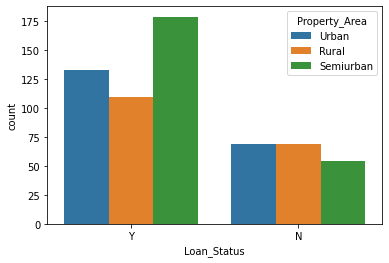

In [16]:
# Countplot of Loan_Status Vs Property_Area

sns.countplot(x = 'Loan_Status', hue = 'Property_Area', data = data)
plt.show()

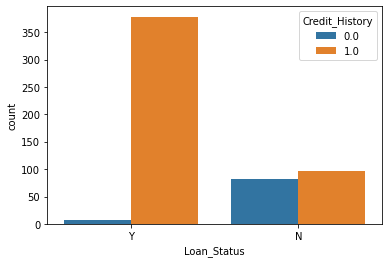

In [17]:
# Countplot of Loan_Status Vs Credit_History

sns.countplot(x = 'Loan_Status', hue = 'Credit_History', data = data)
plt.show()

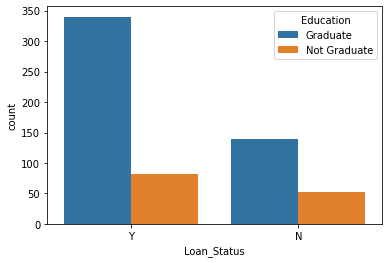

In [18]:
# Countplot of Loan_Status Vs Education

sns.countplot(x = 'Loan_Status', hue = 'Education', data = data)
plt.show()

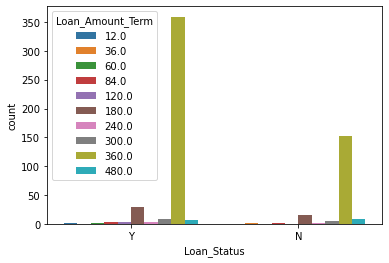

In [19]:
# Countplot of Loan_Status Vs Loan_Amount_Term

sns.countplot(x = 'Loan_Status', hue = 'Loan_Amount_Term', data = data)
plt.show()

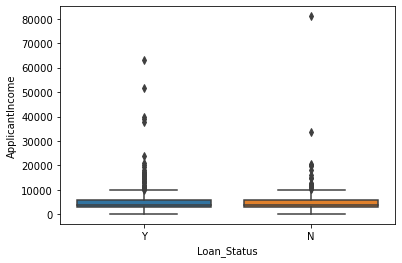

In [20]:
# Box Plot of Loan_Status Vs ApplicantIncome

sns.boxplot( x = data.Loan_Status, y = data.ApplicantIncome)
plt.show()

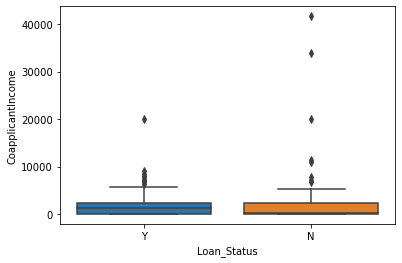

In [21]:
# Box Plot of Loan_Status Vs CoapplicantIncome

sns.boxplot( x = data.Loan_Status, y = data.CoapplicantIncome)
plt.show()

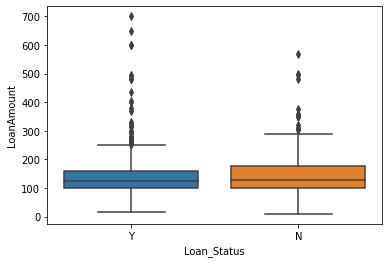

In [22]:
# Box Plot of Loan_Status Vs LoanAmount

sns.boxplot( x = data.Loan_Status, y = data.LoanAmount)
plt.show()

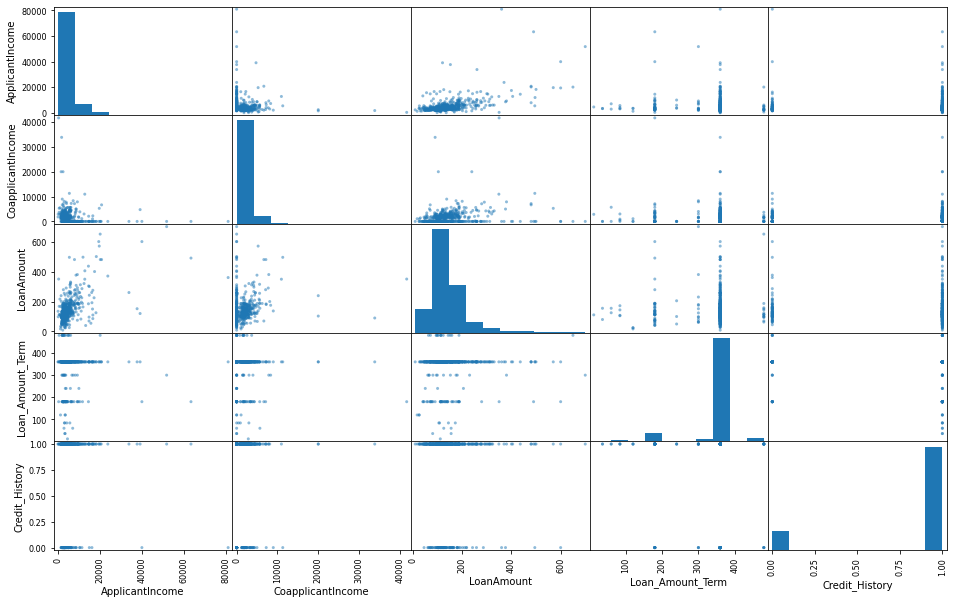

In [23]:
# Scatter Plot

pd.plotting.scatter_matrix(data, figsize = (16, 10))
plt.show()

In [24]:
# Identifying unique values for categorical attributes

for i in data.keys():
    print(i)
    print()
    print('The values are:') 
    print(data[i].value_counts())
    print()
    print()

Loan_ID

The values are:
LP002961    1
LP001560    1
LP002837    1
LP001207    1
LP002142    1
           ..
LP001892    1
LP001013    1
LP001977    1
LP001385    1
LP002237    1
Name: Loan_ID, Length: 614, dtype: int64


Gender

The values are:
Male      489
Female    112
Name: Gender, dtype: int64


Married

The values are:
Yes    398
No     213
Name: Married, dtype: int64


Dependents

The values are:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Education

The values are:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed

The values are:
No     500
Yes     82
Name: Self_Employed, dtype: int64


ApplicantIncome

The values are:
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64


CoapplicantIncome

The values are:
0.0       273
2500.0      5
2083.0      5
1666.0      5
1750.0      3
         ... 
1863.0      1
7166

### Imputing Missing Values

In [25]:
# Checking on columns having missing values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The variables having missing values and their type are as below:
    1. Gender: Gender is a categorical variable which can be replaced by Mode Value.
    2. Maried: Married is a categorical variable which can be replaced by Mode Value.
    3. Dependents: Dependents is a categorical variable which can be replaced by Mode Value.
    4. Self_Employed: Self_Employed is a categorical variable which can be replaced by Mode Value.
    5. Loan Amount: Loan Amount is a numerical variable which can be replaced by Median value.
    6. Loan_Amount_Term: Loan amount term is a categorical variable which can be replaced by Mode Value.
    7. Credit_History: Credit History is a categorical variable which can be replaced by Mode Value.
    

In [26]:
# Imputing values for all categorical variables with Mode

categ_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in categ_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [27]:
# Checking if imputation worked correctly

data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
# Imputing values for LoanAmount column using Median

num_col = ['LoanAmount']
data[num_col] = data[num_col].fillna(data[num_col].median()[0])

In [29]:
# Checking if imputation worked correctly

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the missing values are imputed successfully in dataset.

In [30]:
# Removing Loan_ID column from our dataset

data.drop(["Loan_ID"], axis = 1, inplace = True)

### Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. Nominal data: Data are not in any order -> OneHotEncoder
2. Ordinal data: Data are in order -> LabelEncoder

Categorical Columns: 
'Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History' and 'Property_Area'

Nominal Data: 'Gender', 'Married' are Nominal data so we need to treat them using One Hot Encoder.

Ordinal data: 'Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History' and 'Property_Area' are Ordianl data so we need to treat them using Label Encoder. 

In [31]:
# Using get dummies method on the dataset

data = pd.get_dummies(data, drop_first=True )

In [32]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [33]:
data.shape

(614, 15)

We have handled all the categorical data columns by using GetDummies Method. 

### Bivariate Analysis

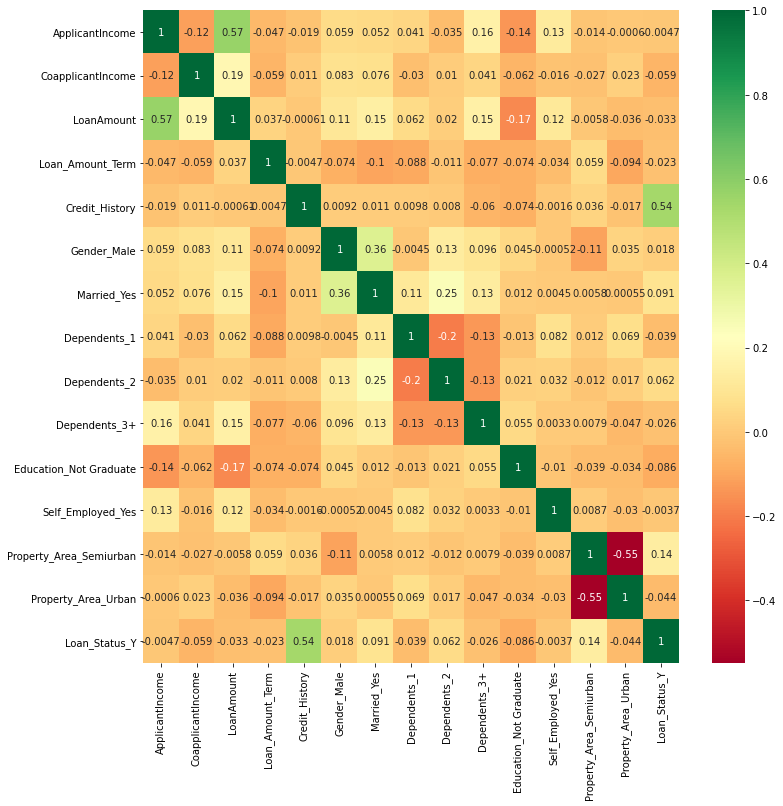

In [34]:
# Correlation Matrix

plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## Spliting the dataset in training and testing set

In [35]:
seed = 10
test_size = 0.25
#train, test = train_test_split(data1, test_size = test_size, random_state = seed)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Loan_Status_Y', axis=1), data['Loan_Status_Y'], test_size = test_size, random_state = seed, stratify = data['Loan_Status_Y'])

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((460, 14), (154, 14), (460,), (154,))

## Model Fit 1 (Using all features on training data)

In [37]:
#Model training
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [38]:
print("Accuracy of the model on training dataset is: ",result.score(X_train, y_train))

Accuracy of the model on training dataset is:  0.7978260869565217


In [39]:
# Making probability predictions on test data

model.predict_proba(X_test)

array([[0.27686891, 0.72313109],
       [0.1448617 , 0.8551383 ],
       [0.15008967, 0.84991033],
       [0.24229535, 0.75770465],
       [0.34072925, 0.65927075],
       [0.11774631, 0.88225369],
       [0.1661857 , 0.8338143 ],
       [0.26249119, 0.73750881],
       [0.34510575, 0.65489425],
       [0.22369339, 0.77630661],
       [0.53591613, 0.46408387],
       [0.36370449, 0.63629551],
       [0.76389964, 0.23610036],
       [0.34572163, 0.65427837],
       [0.1674242 , 0.8325758 ],
       [0.4094686 , 0.5905314 ],
       [0.32352669, 0.67647331],
       [0.16978884, 0.83021116],
       [0.76041232, 0.23958768],
       [0.05373667, 0.94626333],
       [0.10380586, 0.89619414],
       [0.21380121, 0.78619879],
       [0.09331343, 0.90668657],
       [0.2606866 , 0.7393134 ],
       [0.22850525, 0.77149475],
       [0.18443453, 0.81556547],
       [0.33690616, 0.66309384],
       [0.10930385, 0.89069615],
       [0.7761203 , 0.2238797 ],
       [0.28280555, 0.71719445],
       [0.

In [40]:
# Predicting categorical value

model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
      dtype=uint8)

In [41]:
print('classes: ',model.classes_)
print('coefficients: ',model.coef_)
print('intercept :',model.intercept_)

classes:  [0 1]
coefficients:  [[ 1.27738742e-06 -6.71756205e-05 -3.35217134e-03 -5.07339044e-03
   2.52150789e+00  3.69152522e-01  6.66351446e-01  6.92220319e-02
   4.04848420e-01 -1.28267869e-01 -4.96535652e-01  8.34100470e-02
   7.73151337e-01 -2.57639303e-01]]
intercept : [0.22758288]


In [42]:
pred1 = model.predict(X_test)

In [43]:
pred = model.predict(X_test)
labels = [1, 0]
con_mat = confusion_matrix(y_test, pred, labels = labels )
print(con_mat)

[[101   5]
 [ 27  21]]


In [44]:
accuracy=(con_mat[0,0] + con_mat[1,1])/y_test.size
print(accuracy)
print(model.score(X_test, y_test))
#np.mean(y_test == pred)

print("Accuracy of the model on testing dataset is: ",result.score(X_test, y_test))

0.7922077922077922
0.7922077922077922
Accuracy of the model on testing dataset is:  0.7922077922077922


## Model Fit 2 (Using K Fold Cross Validation)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [46]:
folds = StratifiedKFold(n_splits=20)

In [47]:
accuracy_cv = cross_val_score(LogisticRegression(),X_train,y_train,cv=10)
print(accuracy_cv)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.84782609 0.80434783 0.80434783 0.82608696 0.80434783 0.76086957
 0.82608696 0.76086957 0.82608696 0.7826087 ]


In [48]:
accuracy, count = 0,0
for i in accuracy_cv:
    count = count + 1
    accuracy = accuracy + i
print("Accuracy of the model on training dataset is: ",accuracy/count)

Accuracy of the model on training dataset is:  0.8043478260869567


## Model Fit 3 (Using Hypertuning of parameters)

In [49]:
data.Loan_Status_Y.value_counts()

1    422
0    192
Name: Loan_Status_Y, dtype: int64

In [50]:
data.shape

(614, 15)

In [51]:
print(614/(2*192))
print(614/(2*422))

1.5989583333333333
0.7274881516587678


In [52]:
model_2=LogisticRegression(class_weight = {0:1.5989, 1:0.72748}, max_iter = 1000)
model_2.fit(X_train,y_train)
model_2.score(X_test, y_test)

0.6948051948051948

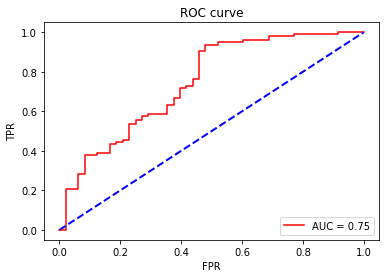

In [53]:
probs = model_2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()

# Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

# Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

# Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [54]:
roc_auc_score(y_test, preds)

0.7454795597484277

In [55]:
print(roc_auc_score(y_test, preds))
print(auc(fpr, tpr))

0.7454795597484277
0.7454795597484276


In [56]:
actual = y_test
predicted = pred1
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.81      0.44      0.57        48
           1       0.79      0.95      0.86       106

    accuracy                           0.79       154
   macro avg       0.80      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154



In [57]:
print("The accuracy of model on testing dataset is:",roc_auc_score(y_test, preds))

The accuracy of model on testing dataset is: 0.7454795597484277


## Model 4 (Using Precision Recall Curve)

In [58]:
from sklearn.metrics import precision_recall_curve
probs = model.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

(0.0, 1.0)

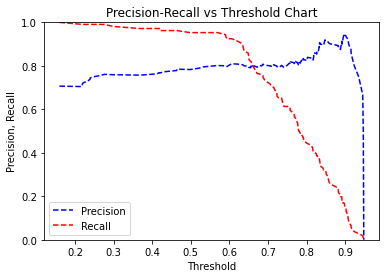

In [59]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

In [60]:
threshold = 0.45
pred = np.where(model.predict_proba(X_test)[:,1] >= threshold, 1, 0)

In [61]:
labels = [1, 0]
con_mat2 = confusion_matrix(y_test, pred, labels = labels )
print(con_mat2)

[[102   4]
 [ 29  19]]


In [62]:
model_3=LogisticRegression(class_weight = {0:0.45, 1:0.78})
model_3.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.45, 1: 0.78})

In [63]:
print("The accuracy of model on testing dataset is:",model_3.score(X_test, y_test))

The accuracy of model on testing dataset is: 0.7662337662337663


## Model 5 (Hypertuning parameters using Grid Search CV)

In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
test_size = 0.3
seed = 20
X_train, X_test, y_train, y_test = train_test_split(data.drop('Loan_Status_Y', axis=1), data['Loan_Status_Y'], test_size = test_size, random_state = seed)
model_4 = LogisticRegression()
model_4_cv = GridSearchCV(model_4,param_grid,cv=5)
model_4_cv.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:54

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [67]:
# Print the optimal parameters and best score
print("Tuned hyperparameters are: {}".format(model_4_cv.best_params_))
print("The accuracy of model on testing dataset is: {}".format(model_4_cv.best_score_))

Tuned hyperparameters are: {'C': 1.0, 'penalty': 'l2'}
The accuracy of model on testing dataset is: 0.8274145006839946


##### After fitting the data into 4 different models with different methods we are getting the best result after HyperParameter Tuning with Grid Search CV method. Hence we will be using this method to do predictions on our actual test dataset. 

#### I hearby confirm that the work done in assignment is original and result of my own work. 

# END